# Cargar librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Funciones

In [31]:
def concatenar_llave(x:pd.Series)->str:
    '''
    DOC: función para crear una llave que permitira fusionar las bases de excel, en este caso se pasa de 
    argumento una Serie de pandas, y devuelve la concatenación necesaria, para aplicar usar junto apply y la
    opción de axis=1. Usar columnas de codigo de segmento, de subsegmento y de calificación de riesgos.
    '''
    x[0]=str(x[0])
    x[1]=str(x[1])
    x[2]=str(x[2])
    return x[0]+x[1]+x[2]

In [32]:
def texto_productos(x:str)->str:
    '''
    DOC: Función creada para extraer el producto de la columna id_producto, adicional elimina espacios
    innecesarios y reemplaza el simbolo Ã© del encoding utf-8 por su significado en latin1 (é).
    '''
    texto_crudo=x[0].split("-")[-1]
    texto_espacios=texto_crudo.strip()
    texto_limpio=texto_espacios.replace('Ã©','é')
    return texto_limpio

In [33]:
def select_tasa(x):
    '''
    DOC: Función creada para colocar la tasa especifica del producto correspondiente
    '''
    if (x[0]=="Cartera Total") | (x[0]=="cartera"):
        return x[1]
    elif x[0]=="operacion_especifica":
        return x[2]
    elif x[0]=="Hipotecario":
        return x[3]
    elif (x[0]=="leasing") | (x[0]=="Leasing Cartera Total"):
        return x[4]
    elif x[0]=="Sufi":
        return x[5]
    elif x[0]=="factoring":
        return x[6]
    else:
        return x[7]

# Cargar datos y primeros análisis

Lo primero que se debe hacer es cargar los archivos y verificar que los datos sean leidos correctamente, es decir, se debe verificar que los tipos de datos coincidan con los datos. Adicionalmente se debe verificar valores perdidos, número de categorias por variables que sean de este tipo y otras estadísticas descriptivas pertinentes.

## Obligaciones_clientes.xlsx

In [47]:
# Cargar los datos de obligaciones y asegurar que fecha_desembolso sea leido como formato fecha, así como 
#asegurarse de que cod_segm_tasa sea cargado como string según metadatos de la tabla
obligaciones=pd.read_excel("Obligaciones_clientes.xlsx",
                           sheet_name="Obligaciones_clientes",
                           header=0)

obligaciones['fecha_desembolso']=pd.to_datetime(obligaciones['fecha_desembolso'],
                                                format="%m/%d/%Y")

obligaciones['cod_segm_tasa']=obligaciones['cod_segm_tasa'].astype("str")

obligaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   radicado          2048 non-null   int64         
 1   num_documento     2048 non-null   int64         
 2   cod_segm_tasa     2048 non-null   object        
 3   cod_subsegm_tasa  2048 non-null   int64         
 4   cal_interna_tasa  2048 non-null   object        
 5   id_producto       2048 non-null   object        
 6   tipo_id_producto  2048 non-null   object        
 7   valor_inicial     2048 non-null   float64       
 8   fecha_desembolso  2048 non-null   datetime64[ns]
 9   plazo             2042 non-null   float64       
 10  cod_periodicidad  2048 non-null   int64         
 11  periodicidad      2048 non-null   object        
 12  saldo_deuda       2048 non-null   float64       
 13  modalidad         2048 non-null   object        
 14  tipo_plazo        2048 n

In [3]:
obligaciones.head()

radicado  num_documento cod_segm_tasa  cod_subsegm_tasa  \
0  14427616502     1081648945             5                 2   
1  14427616257     1032058622             2                -1   
2  14427615471     1081374249             5                 2   
3  14426546522      996136114             5                 1   
4  14427616197     1080662762             5                 2   

  cal_interna_tasa                             id_producto  \
0               C4              OEL - operacion_especifica   
1               R1  0000000000097492172 - 29-Cartera Total   
2               C4                           OEL - leasing   
3               C1  0000000090000272791 - 29-Cartera Total   
4               C4  0000000090000242224 - 29-Cartera Total   

        tipo_id_producto  valor_inicial fecha_desembolso  plazo  \
0    cod_plan - producto   1.050000e+06       2023-01-31   60.0   
1  Obligacion - producto   2.848500e+05       2021-09-30   61.0   
2    cod_plan - producto   7.528858e+04       2023-01-31   60.0   
3  Obligacion - producto   6.240000e+05       2021-09-30  121.0   
4  Obligacion - producto   1.909350e+05       2021-12-31   48.0   

   cod_periodicidad periodicidad   saldo_deuda modalidad tipo_plazo  
0                 1      MENSUAL  1.050000e+06     Nuevo         LP  
1                 1      MENSUAL  2.414313e+05    Actual         LP  
2                 1      MENSUAL  7.528858e+04     Nuevo         LP  
3                 1      MENSUAL  4.375334e+05    Actual         LP  
4                 1      MENSUAL  1.159688e+05    Actual         LP

### Valores faltantes

In [4]:
# Verificar valores nulos
obligaciones.isna().sum()

radicado            0
num_documento       0
cod_segm_tasa       0
cod_subsegm_tasa    0
cal_interna_tasa    0
id_producto         0
tipo_id_producto    0
valor_inicial       0
fecha_desembolso    0
plazo               6
cod_periodicidad    0
periodicidad        0
saldo_deuda         0
modalidad           0
tipo_plazo          0
dtype: int64

### Variables categoricas

In [5]:
# Número de categorias por variables de tipo object y algunas estadísticas
obj_obligaciones=obligaciones.select_dtypes(include=[object])
obj_obligaciones.describe()

cod_segm_tasa cal_interna_tasa    id_producto     tipo_id_producto  \
count           2048             2048           2048                 2048   
unique             3               26            788                    2   
top                5               C1  RLP - cartera  cod_plan - producto   
freq            1645              245            419                 1210   

       periodicidad modalidad tipo_plazo  
count          2048      2048       2048  
unique            5         2          2  
top         MENSUAL    Actual         CP  
freq           1928      1220       1459

In [6]:
# cod_segm_tasa proporción de categorias
obligaciones.cod_segm_tasa.value_counts(normalize=True)

cod_segm_tasa
5    0.803223
2    0.153320
9    0.043457
Name: proportion, dtype: float64

In [7]:
# cal_interna_tasa proporción de categorias
obligaciones.cal_interna_tasa.value_counts(normalize=True)

cal_interna_tasa
C1     0.119629
C16    0.106445
C2     0.086426
C15    0.069336
C13    0.064941
C14    0.063477
R3     0.063477
C3     0.061035
C7     0.046875
C6     0.040527
C9     0.040039
C8     0.033691
R2     0.032715
C5     0.025391
C12    0.023926
C4     0.023438
R5     0.021973
R9     0.018066
C11    0.014648
C19    0.011230
C10    0.009766
R4     0.009277
C18    0.005859
R8     0.004395
R1     0.001953
R6     0.001465
Name: proportion, dtype: float64

In [8]:
# id_producto proporción de categorias
obligaciones.id_producto.value_counts(normalize=True)

id_producto
RLP - cartera                             0.204590
OPE - operacion_especifica                0.130371
TDC - tarjeta                             0.102051
RCP - cartera                             0.082520
AUD - cartera                             0.055664
                                            ...   
0000000000002900972 - 29-Cartera Total    0.000488
0000000000100204777 - 29-Cartera Total    0.000488
0000000000004441009 - 29-Cartera Total    0.000488
0000000000904179477 - 29-Cartera Total    0.000488
0000000090000292120 - 29-Cartera Total    0.000488
Name: proportion, Length: 788, dtype: float64

In [9]:
# tipo_id_producto proporción de categorias
obligaciones.tipo_id_producto.value_counts(normalize=True)

tipo_id_producto
cod_plan - producto      0.59082
Obligacion - producto    0.40918
Name: proportion, dtype: float64

In [10]:
# periodicidad proporción de categorias
obligaciones.periodicidad.value_counts(normalize=True)

periodicidad
MENSUAL       0.941406
SEMESTRAL     0.030273
TRIMESTRAL    0.020020
ANUAL         0.007324
BIMENSUAL     0.000977
Name: proportion, dtype: float64

In [11]:
# modalidad proporción de categorias
obligaciones.modalidad.value_counts(normalize=True)

modalidad
Actual    0.595703
Nuevo     0.404297
Name: proportion, dtype: float64

In [12]:
# tipo_plazo proporción de categorias
obligaciones.tipo_plazo.value_counts(normalize=True)

tipo_plazo
CP    0.712402
LP    0.287598
Name: proportion, dtype: float64

### Variables númericas

In [13]:
# Algunas estadísticas para las variables númericas
num_obligaciones=obligaciones.select_dtypes(include=[int,float])
num_obligaciones=num_obligaciones.iloc[:,2:]
num_obligaciones.describe()

cod_subsegm_tasa  valor_inicial          plazo  cod_periodicidad  \
count       2048.000000   2.048000e+03    2042.000000       2048.000000   
mean           1.887695   3.376266e+05     285.585211          1.272949   
std            1.715496   8.310146e+05    9122.230011          1.284689   
min           -1.000000   3.453000e+01       0.000000          1.000000   
25%            1.000000   3.705000e+04      12.000000          1.000000   
50%            2.000000   1.131000e+05      36.000000          1.000000   
75%            3.000000   3.043125e+05      48.000000          1.000000   
max            4.000000   1.395000e+07  400000.000000         12.000000   

        saldo_deuda  
count  2.048000e+03  
mean   2.462359e+05  
std    6.592792e+05  
min    0.000000e+00  
25%    1.953816e+04  
50%    7.208614e+04  
75%    2.249720e+05  
max    1.385120e+07

In [14]:
# Maximo creditos de largo plazo 360 meses, más alla de eso son datos atípicos
obligaciones.loc[(obligaciones.plazo>360) | (obligaciones.plazo==0),
["num_documento","plazo","periodicidad"]]

num_documento     plazo periodicidad
62        960028092       0.0      MENSUAL
146       993600972  400000.0      MENSUAL
202      1080581496     390.0      MENSUAL
386       996040778     402.0      MENSUAL
412      1081249122     370.0      MENSUAL
611       960192139     391.0      MENSUAL
726      1080153396     449.0      MENSUAL
790       996127208     519.0      MENSUAL
980      1080982376  100000.0      MENSUAL
1014       96312363     448.0      MENSUAL
1195      966020760       0.0      MENSUAL
1317       50034064     398.0      MENSUAL
1547      996088140       0.0      MENSUAL
1714      996099974     368.0      MENSUAL
1788     1080637473     402.0      MENSUAL
1920      113176412     388.0      MENSUAL
2002       88296006     424.0      MENSUAL

In [15]:
num_obligaciones.head()

cod_subsegm_tasa  valor_inicial  plazo  cod_periodicidad   saldo_deuda
0                 2   1.050000e+06   60.0                 1  1.050000e+06
1                -1   2.848500e+05   61.0                 1  2.414313e+05
2                 2   7.528858e+04   60.0                 1  7.528858e+04
3                 1   6.240000e+05  121.0                 1  4.375334e+05
4                 2   1.909350e+05   48.0                 1  1.159688e+05

#### Correlaciones

In [16]:
num_obligaciones=num_obligaciones.loc[num_obligaciones.plazo<=360,:]
num_obligaciones.isna().sum()

cod_subsegm_tasa    0
valor_inicial       0
plazo               0
cod_periodicidad    0
saldo_deuda         0
dtype: int64

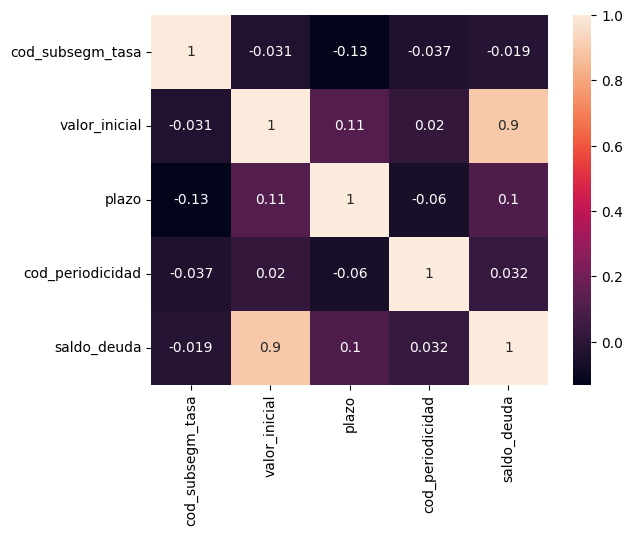

In [17]:
corr_matrix_obl = num_obligaciones.corr()
sn.heatmap(corr_matrix_obl, annot=True)
plt.show()

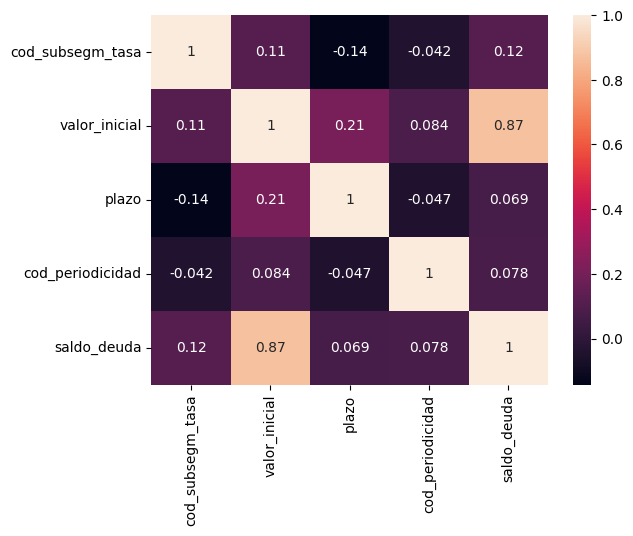

In [18]:
corr_matrix_obl = num_obligaciones.corr(method="spearman")
sn.heatmap(corr_matrix_obl, annot=True)
plt.show()

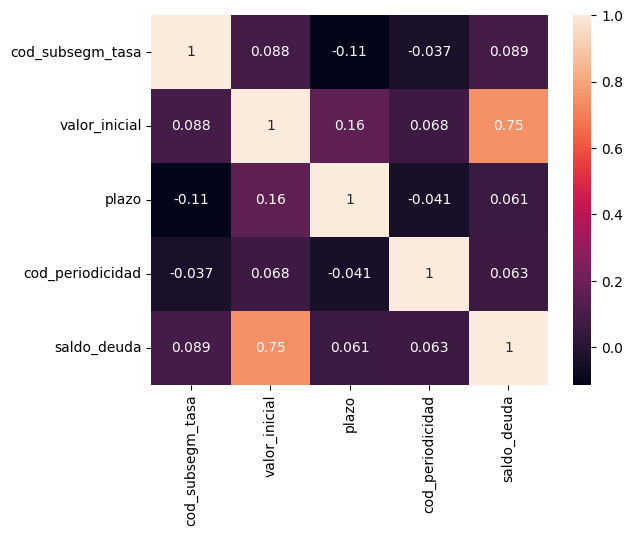

In [19]:
corr_matrix_obl = num_obligaciones.corr(method="kendall")
sn.heatmap(corr_matrix_obl, annot=True)
plt.show()

* Se encuentran valores atípicos en la variable **plazo**, se eliminan plazos mayores a 360 meses, siendo el plazo máximo registrado para créditos hipotecarios, los de más largo plazo.

* Se puede ver que ante diferentes formas de calcular las correlaciones (pearson, spearman, kendall), el **valor inicial de la deuda** y el **saldo actual** guardan una gran correlación.

In [20]:
obligaciones.replace([np.nan],"NULL",inplace=True)
obligaciones.to_csv("obligaciones.csv", index=False,encoding='latin')

## tasas_productos.xlsx

In [21]:
# Cargar los datos de obligaciones y asegurar que cod_segmento así como cod_subsegmento sea cargado como 
#string según metadatos de la tabla
tasas=pd.read_excel("tasas_productos.xlsx",
                           sheet_name="Tasas",
                           header=0)

#obligaciones['fecha_desembolso']=pd.to_datetime(obligaciones['fecha_desembolso'],
 #                                               format="%m/%d/%Y")

tasas['cod_segmento']=tasas['cod_segmento'].astype("str")
tasas['cod_subsegmento']=tasas['cod_subsegmento'].astype("str")

tasas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cod_segmento               117 non-null    object 
 1   segmento                   117 non-null    object 
 2   cod_subsegmento            117 non-null    object 
 3   calificacion_riesgos       117 non-null    object 
 4   tasa_cartera               117 non-null    float64
 5   tasa_operacion_especifica  117 non-null    float64
 6   tasa_hipotecario           117 non-null    float64
 7   tasa_leasing               117 non-null    float64
 8   tasa_sufi                  117 non-null    float64
 9   tasa_factoring             117 non-null    float64
 10  tasa_tarjeta               117 non-null    float64
dtypes: float64(7), object(4)
memory usage: 10.2+ KB


In [22]:
tasas.head()

cod_segmento                   segmento cod_subsegmento  \
0            9  NEGOCIOS E INDEPENDIENTES              -1   
1            9  NEGOCIOS E INDEPENDIENTES              -1   
2            9  NEGOCIOS E INDEPENDIENTES              -1   
3            9  NEGOCIOS E INDEPENDIENTES              -1   
4            9  NEGOCIOS E INDEPENDIENTES              -1   

  calificacion_riesgos  tasa_cartera  tasa_operacion_especifica  \
0                  C12      0.259170                   0.242689   
1                  C11      0.250350                   0.239824   
2                  C10      0.244242                   0.237597   
3                   C9      0.232909                   0.233487   
4                   C8      0.223275                   0.228521   

   tasa_hipotecario  tasa_leasing  tasa_sufi  tasa_factoring  tasa_tarjeta  
0          0.184613      0.146794   0.134048        0.146465        0.3867  
1          0.206170      0.137014   0.126061        0.158310        0.3867  
2          0.089940      0.137798   0.116774        0.164796        0.3867  
3          0.159345      0.143824   0.123468        0.168163        0.3867  
4          0.137500      0.144439   0.189358        0.175926        0.3867

### Variables categoricas

In [23]:
# Número de categorias por variables de tipo object y algunas estadísticas
obj_tasas=tasas.select_dtypes(include=[object])
obj_tasas.describe()

cod_segmento segmento cod_subsegmento calificacion_riesgos
count           117      117             117                  117
unique            4        4               5                   30
top               5     PYME              -1                  C12
freq             76       76              41                    5

### Variables númericas

In [24]:
# Algunas estadísticas para las variables númericas
num_tasas=tasas.select_dtypes(include=[int,float])
tasas.describe()

tasa_cartera  tasa_operacion_especifica  tasa_hipotecario  \
count    117.000000                 117.000000        117.000000   
mean       0.216555                   0.206993          0.145911   
std        0.047485                   0.037443          0.038104   
min        0.121857                   0.125019          0.072960   
25%        0.181164                   0.183374          0.124317   
50%        0.213129                   0.212406          0.149184   
75%        0.252353                   0.233487          0.160708   
max        0.341465                   0.268191          0.279610   

       tasa_leasing   tasa_sufi  tasa_factoring  tasa_tarjeta  
count    117.000000  117.000000      117.000000  1.170000e+02  
mean       0.125714    0.106264        0.150124  3.867000e-01  
std        0.016274    0.029092        0.021251  5.574991e-17  
min        0.082563    0.030000        0.117449  3.867000e-01  
25%        0.113946    0.086381        0.139856  3.867000e-01  
50%        0.126644    0.106629        0.146465  3.867000e-01  
75%        0.137798    0.125831        0.158310  3.867000e-01  
max        0.167353    0.189358        0.253819  3.867000e-01

#### Correlaciones

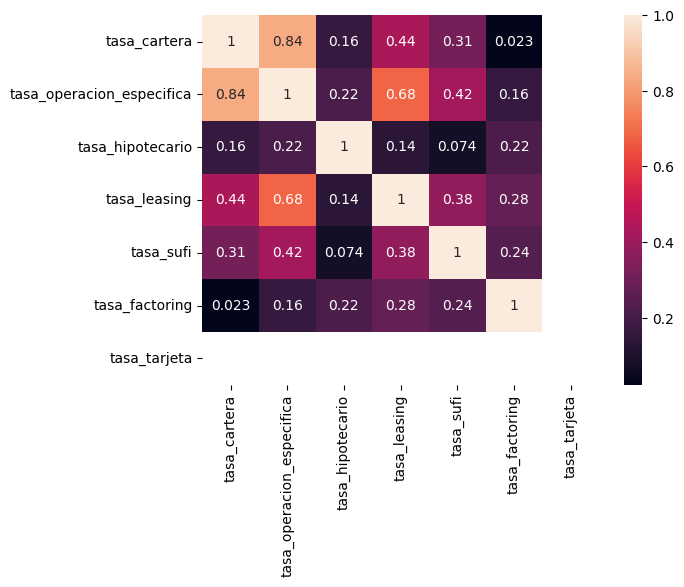

In [25]:
corr_matrix_tasas = num_tasas.corr()
sn.heatmap(corr_matrix_tasas, annot=True)
plt.show()

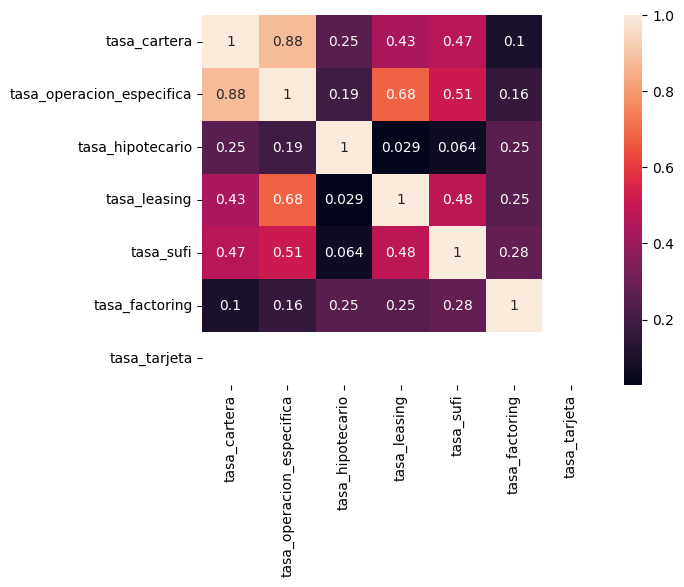

In [26]:
corr_matrix_tasas = num_tasas.corr(method="spearman")
sn.heatmap(corr_matrix_tasas, annot=True)
plt.show()

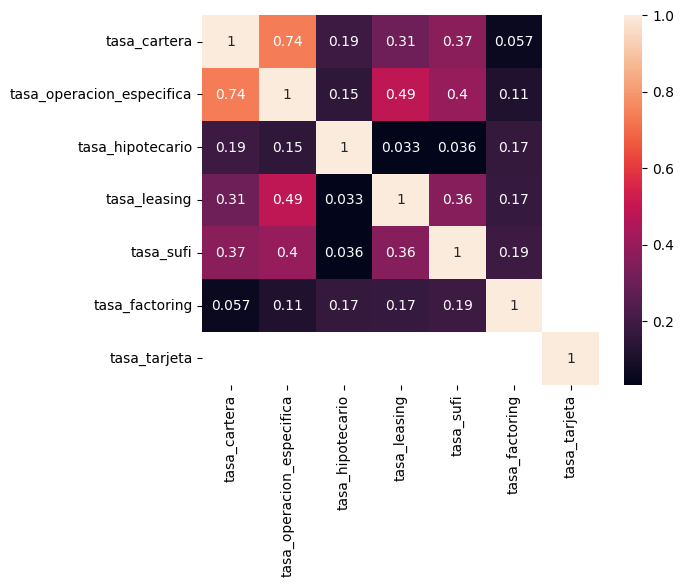

In [27]:
corr_matrix_tasas = num_tasas.corr(method="kendall")
sn.heatmap(corr_matrix_tasas, annot=True)
plt.show()

In [28]:
tasas.to_csv("tasas.csv", index=False,encoding='latin')

## Preguntas

In [ ]:
obligaciones=pd.read_excel("Obligaciones_clientes.xlsx",
                           sheet_name="Obligaciones_clientes",
                           header=0)

obligaciones['fecha_desembolso']=pd.to_datetime(obligaciones['fecha_desembolso'],
                                                format="%m/%d/%Y")

obligaciones['cod_segm_tasa']=obligaciones['cod_segm_tasa'].astype("str")

In [ ]:
tasas=pd.read_excel("tasas_productos.xlsx",
                           sheet_name="Tasas",
                           header=0)

#obligaciones['fecha_desembolso']=pd.to_datetime(obligaciones['fecha_desembolso'],
 #                                               format="%m/%d/%Y")

tasas['cod_segmento']=tasas['cod_segmento'].astype("str")
tasas['cod_subsegmento']=tasas['cod_subsegmento'].astype("str")

In [48]:
obligaciones=obligaciones.loc[obligaciones.plazo<=360,:]
obligaciones.isna().sum()

radicado            0
num_documento       0
cod_segm_tasa       0
cod_subsegm_tasa    0
cal_interna_tasa    0
id_producto         0
tipo_id_producto    0
valor_inicial       0
fecha_desembolso    0
plazo               0
cod_periodicidad    0
periodicidad        0
saldo_deuda         0
modalidad           0
tipo_plazo          0
dtype: int64

In [49]:
obligaciones["llave"]=obligaciones.loc[:,["cod_segm_tasa","cod_subsegm_tasa","cal_interna_tasa"]].apply(concatenar_llave,axis=1)
tasas["llave"]=tasas.loc[:,["cod_segmento","cod_subsegmento","calificacion_riesgos"]].apply(concatenar_llave,axis=1)

In [50]:
intermedio=obligaciones.merge(tasas,
                   how='left',
                   on='llave')
intermedio["productos"]=intermedio.loc[:,["id_producto"]].apply(texto_productos,axis=1)
intermedio.productos.value_counts()

productos
cartera                  697
Cartera Total            639
operacion_especifica     268
tarjeta                  209
Tarjeta de Crédito       122
Leasing Cartera Total     59
leasing                   19
factoring                  9
Sufi                       3
Hipotecario                3
Name: count, dtype: int64

In [51]:
intermedio["tasa"]=intermedio.loc[:,
["productos","tasa_cartera","tasa_operacion_especifica","tasa_hipotecario","tasa_leasing","tasa_sufi","tasa_factoring","tasa_tarjeta"]].apply(select_tasa,axis=1)
intermedio["tasa_efectiva"]=(1+intermedio["tasa"])**(intermedio["cod_periodicidad"]/12)-1
intermedio["valor_final"]=intermedio["tasa_efectiva"]*intermedio["valor_inicial"]
intermedio.loc[(intermedio.productos=="Cartera Total"),["productos"]]="cartera"
intermedio.loc[(intermedio.productos=="Tarjeta de Crédito"),["productos"]]="tarjeta"
intermedio.loc[(intermedio.productos=="Leasing Cartera Total"),["productos"]]="leasing"

<Axes: xlabel='fecha_desembolso'>

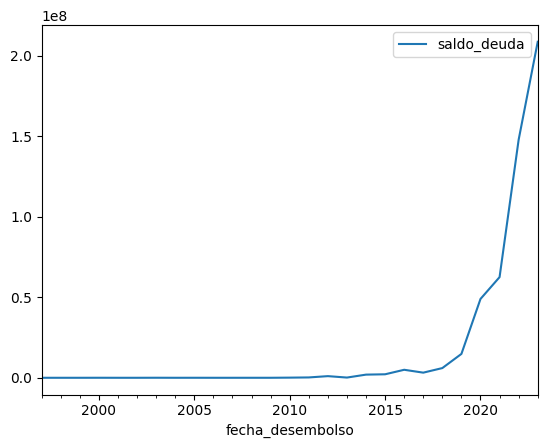

In [52]:
intermedio.loc[:,["saldo_deuda","fecha_desembolso"]].resample("Y",on="fecha_desembolso").sum().plot()

<Axes: xlabel='calificacion_riesgos', ylabel='tasa'>

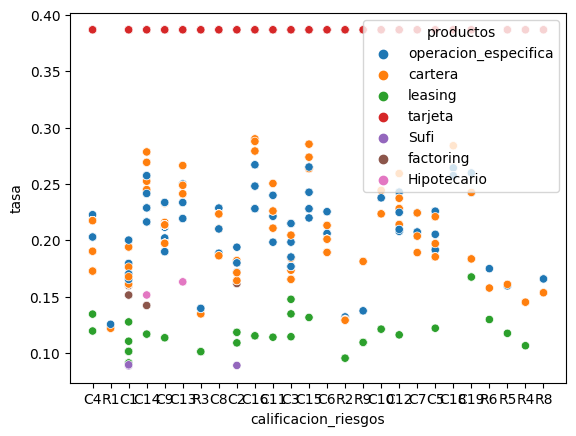

In [53]:
sn.scatterplot(intermedio,x="calificacion_riesgos",y="tasa", hue="productos")

<Axes: xlabel='calificacion_riesgos', ylabel='saldo_deuda'>

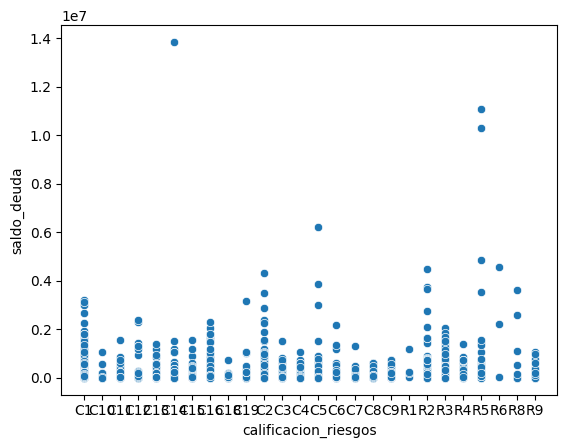

In [40]:
intermedio=intermedio.sort_values(by="calificacion_riesgos")
sn.scatterplot(intermedio,x="calificacion_riesgos",y="saldo_deuda")

In [41]:
pd.crosstab(intermedio.productos,intermedio.segmento)

segmento              Empresarial  NEGOCIOS E INDEPENDIENTES  PYME
productos                                                         
Hipotecario                     0                          0     4
Sufi                            0                          0     3
cartera                       220                         36  1098
factoring                       1                          0     8
leasing                        35                          0    43
operacion_especifica           17                         27   224
tarjeta                        41                         26   265

In [54]:

intermedio.groupby("segmento")["plazo"].agg(["mean","count","median","std"])

mean  count  median        std
segmento                                                      
Empresarial                46.736334    311    36.0  49.481126
NEGOCIOS E INDEPENDIENTES  57.295455     88    51.5  44.284389
PYME                       35.996931   1629    24.0  38.815469